In [3]:
#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

# uses custom metis style sheet for notebooks
from IPython.core.display import HTML
HTML("""<link rel="stylesheet" href="https://soph.info/metis/nb.css" type="text/css"/>""")


import pickle
import re
import string
import nltk
import pandas as pd
import spacy
import re
import string
from gensim import matutils, models
import scipy.sparse
from collections import Counter
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# spacy.prefer_gpu()
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle


Populating the interactive namespace from numpy and matplotlib


In [1]:
import numpy as np
import pandas as pd
data_df = pd.read_pickle('cleaned_list_df.pickle')
wsb = data_df.T['wsb'].tolist()
data_df
psy = data_df.T['ama'].tolist()
psy

['tldr do whatever the fuck you want',
 'so youre telling me people on the internet lie',
 '',
 'this is so funny this subreddit got fucked by one person',
 'a note about celebrity request bans when riama thats the bigger sub had its peak wave of popularity about ten years ago that sub and therefore this sub was full of requests for amas  they took up about half of all the submissions  no one ever requests people at all anymorecelebs or otherwiseso that rule may seem a bit out of place  but before you would just scroll down this page and see a bunch of requests for will smith lady gaga the queen of england etc which was annoying because at the time it had like  people total  feel free to request classes of people to post amas though im not sure why that disappeared',
 'do you like cantaloupe',
 'what does ama stand for',
 ' i liked that guy he seemed like a really nice person',
 'hmmm ok thnx for clarifying all that but one quick q did cancer kid get like verified or anything before he

In [4]:
# from textblob import TextBlob

vec = TfidfVectorizer()
matrix = vec.fit_transform(psy)
idf_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
idf_df



,aaahhh,aas,aave,aaww,abandon,abandoned,abcdefghijklmnopqrstuvwxyz,abducted,abilies,ability,...,yuck,yum,yup,zadra,zakulon,zones,zoo,zookeeper,zoom,zoompleaños
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
from sklearn.cluster import KMeans

number_of_clusters=4
km = KMeans(n_clusters=number_of_clusters, n_jobs=-1)

km.fit(idf_df)


/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [20]:
idf_df

,aa,abandoned,abandoning,abandonment,abbreviated,abcd,ability,abject,able,ableist,...,zelfmoord,zero,zidenberg,zillion,zone,zoning,zoom,zooming,zuc,zurita
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.081323,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.067398,0.0,0.0,0.0,...,0.0,0.0,0.077900,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101136,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101137,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101138,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101139,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
clusters = []
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    clusters.append("Cluster {}: {}".format(i, ' '.join(top_ten_words)))
clusters

Top terms per cluster:


['Cluster 0: none to the do and',
 'Cluster 1: you do the to what',
 'Cluster 2: and the to of it',
 'Cluster 3: your is no the im']

In [8]:
labs = km.labels_
len(km.labels_)

101141

In [ ]:
idf_df.to_pickle("science_idf_df_with_clusters.pickle")

In [9]:
y = km.labels_

In [10]:
# Take all of the data and plot it on 2 dimensions
pca = PCA(n_components=2)
pca.fit(idf_df)
pcafeatures_train = pca.transform(idf_df)

In [11]:
# Create a plot of the PCA results
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','g','b','c','m','y','orange','w','aqua','yellow'])
    target_ids = range(len(target_names))
    plt.figure(figsize=(10,10))
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label, edgecolors='gray')
    plt.legend()

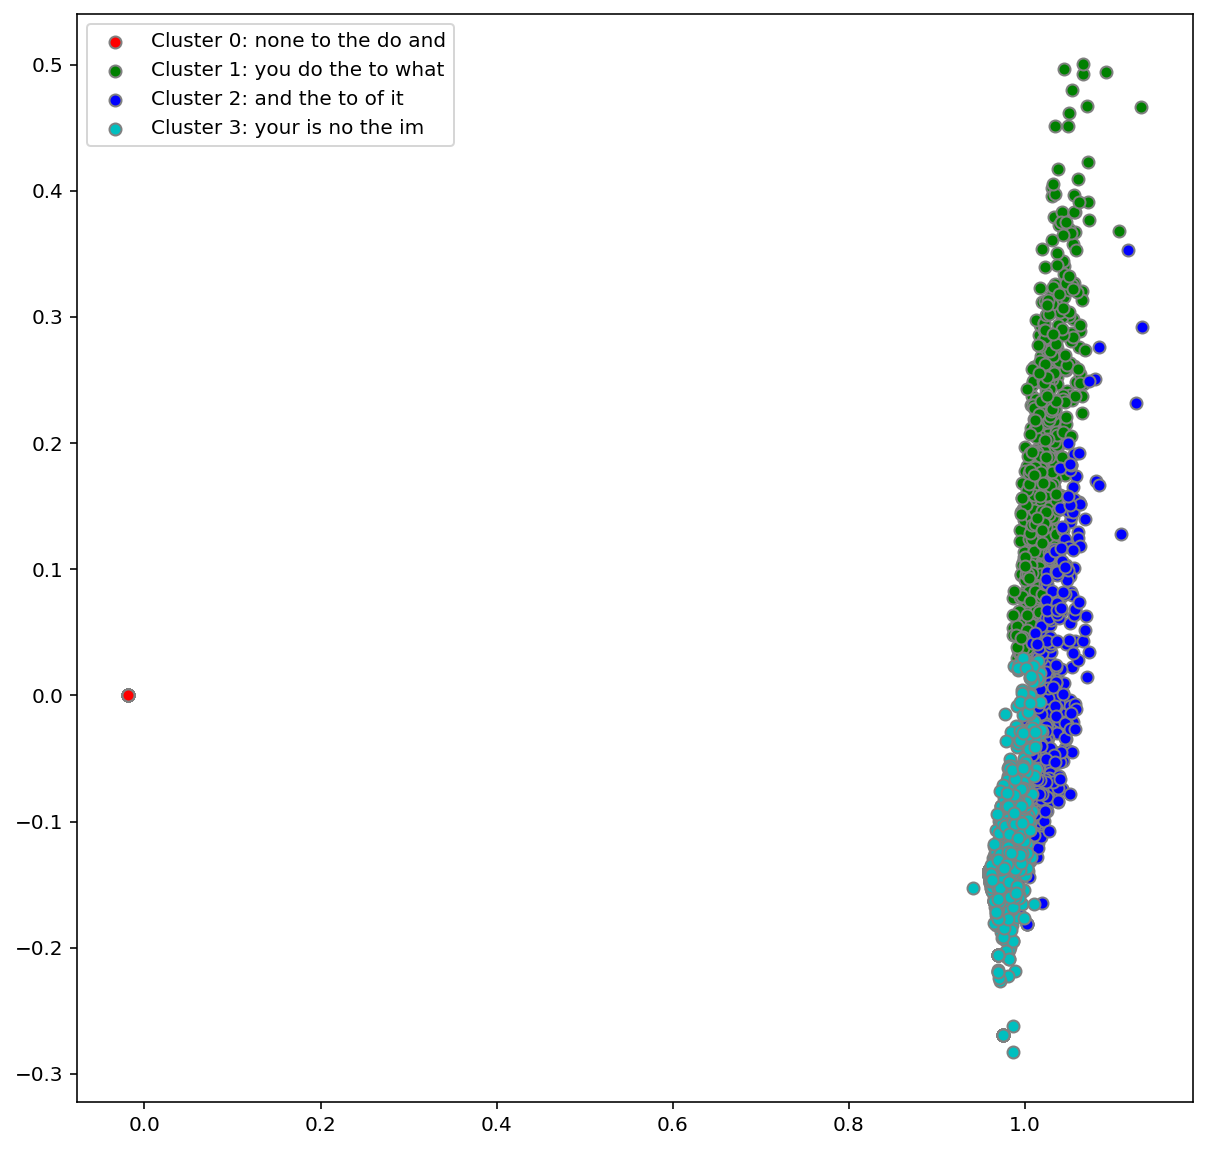

In [12]:
# plot of all the numbers
plot_PCA_2D(pcafeatures_train, target=y, target_names=clusters)

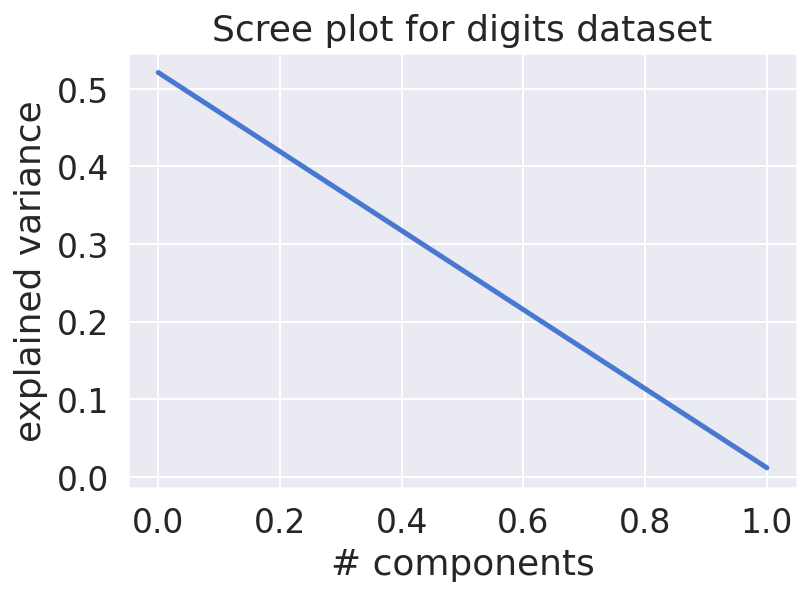

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for digits dataset');

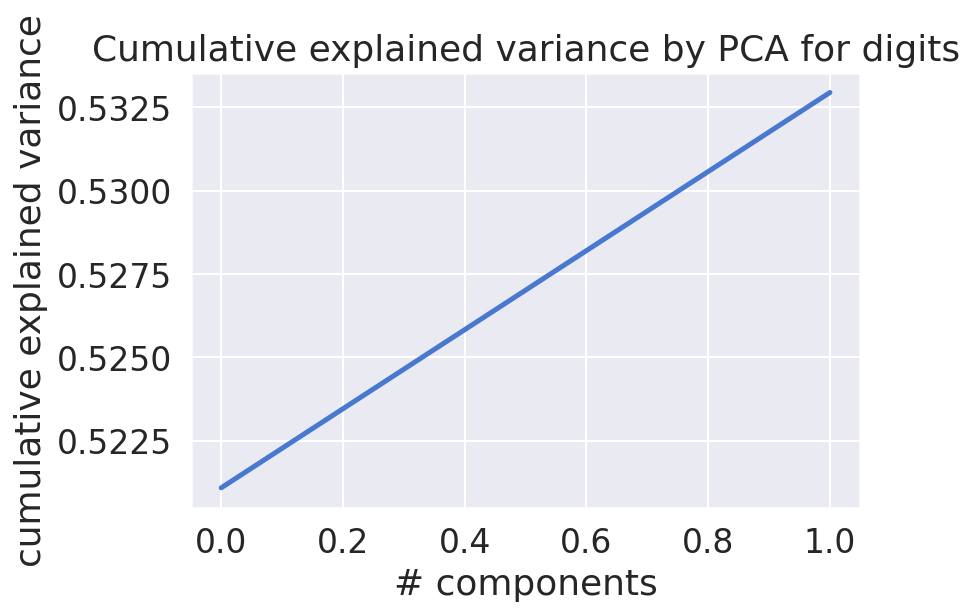

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by PCA for digits');

In [18]:
# sklearn implements t-SNE.
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)


# Import seaborn and matplotlib.patheffects to make nice plots.
import seaborn as sns
import matplotlib.patheffects as PathEffects
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

# Random state.
RS = 20200807
# # We first reorder the data points according to the handwritten numbers.
# X = np.vstack([digits.data[digits.target==i]
#                for i in range(10)])
# y = np.hstack([digits.target[digits.target==i]
#                for i in range(10)])
digits_proj = TSNE(random_state=RS).fit_transform(pcafeatures_train)

/home/nick/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/nick/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(<Figure size 576x576 with 1 Axes>,
 [Text(0.17871998, 0.03827227, '0'),
  Text(-11.529415, -5.330794, '1'),
  Text(-12.289685, -2.5259867, '2'),
  Text(-12.658332, -0.0805383, '3'),
  Text(nan, nan, '4'),
  Text(nan, nan, '5'),
  Text(nan, nan, '6'),
  Text(nan, nan, '7'),
  Text(nan, nan, '8'),
  Text(nan, nan, '9')])

WARNING - 21:19:25: posx and posy should be finite values
WARNING - 21:19:25: posx and posy should be finite values
WARNING - 21:19:25: posx and posy should be finite values
WARNING - 21:19:25: posx and posy should be finite values
WARNING - 21:19:25: posx and posy should be finite values
WARNING - 21:19:25: posx and posy should be finite values
WARNING - 21:19:26: posx and posy should be finite values
WARNING - 21:19:26: posx and posy should be finite values
WARNING - 21:19:26: posx and posy should be finite values
WARNING - 21:19:26: posx and posy should be finite values
WARNING - 21:19:26: posx and posy should be finite values
WARNING - 21:19:26: posx and posy should be finite values


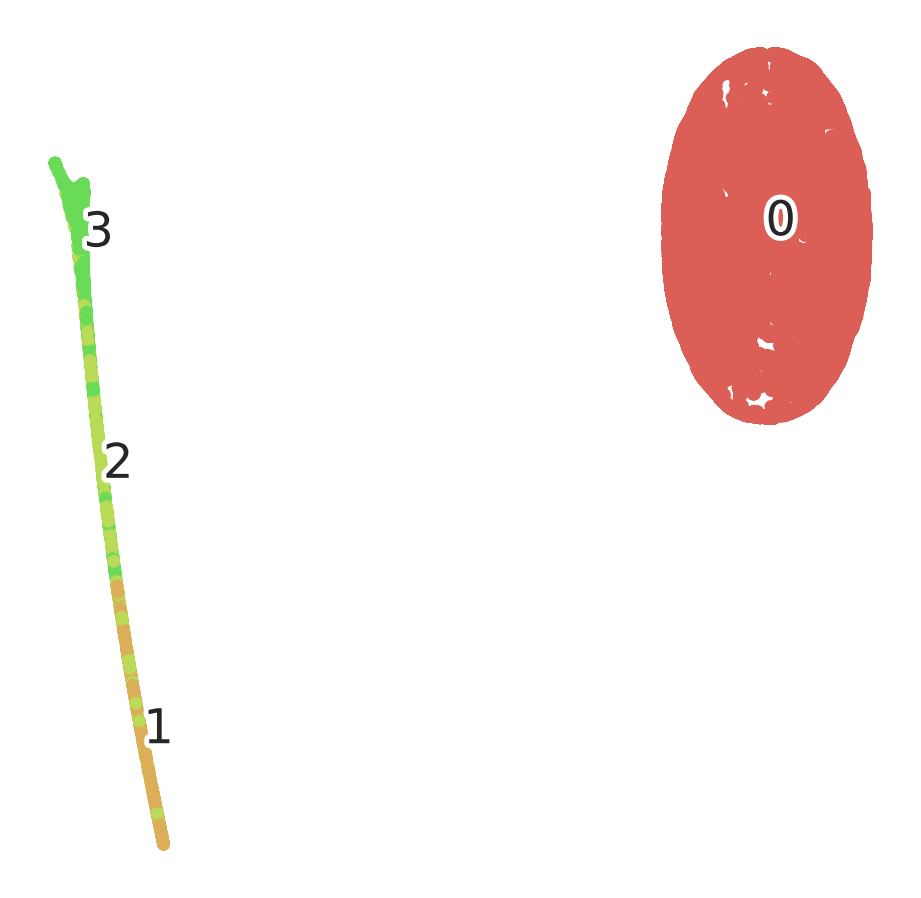

In [19]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts
scatter(digits_proj, y)

In [16]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot


labels = km.labels_
centroids = km.cluster_centers_

for i in range(20):
    # select only data observations with cluster label == i
    ds = idf_df[np.where(labels==i)]
    # plot the data observations
    pyplot.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()

result = zip(X , kmeans.labels_)

sortedR = sorted(result, key=lambda x: x[1])
sortedR

TypeError: '(array([ 59966,  59967,  59968, ..., 101138, 101139, 101140]),)' is an invalid key

In [8]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: underwater letting near future thanks
Cluster 1: none 𓀐𓂸 formaldehyde form forlorn
Cluster 2: am childbirth you tribe rude
Cluster 3: and for overcook complimented irks
Cluster 4: the is to and this
Cluster 5: freeway rob piling stockpiling trucks
Cluster 6: yes the ah please is
Cluster 7: yields higher due would be
Cluster 8: problems learning along that will
Cluster 9: glasses my contacts wear to
Cluster 10: subgroups asian exclusion students american
Cluster 11: you to the that and
Cluster 12: thats the to of not
Cluster 13: processes chemical density energy much
Cluster 14: charge party insurance shouldnt response
Cluster 15: unemployment benefits we ran get
Cluster 16: dude the to you and
Cluster 17: singular one need mutates nail
Cluster 18: eyes my and it the
Cluster 19: the to of and is


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(wsb_dtm)


In [ ]:
y_kmeans = kmeans.predict(wsb_dtm)

In [ ]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [ ]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(wsb_dtm)

In [ ]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(data_dtmn)
display_cluster(data_dtmn,km,num_clusters)

In [ ]:
num_clusters = 7
km = KMeans(n_clusters=num_clusters)
km.fit(data_dtmn.transpose())
display_cluster(data_dtmn.transpose(),km,num_clusters)